In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
df = pd.read_csv('data/data_2.csv',dtype=float)

In [3]:
df.head()

,AGE,BMI,BP_HIGH,TOT_CHOLE,HDL_CHOLE,LDL_CHOLE,stroke,DM,current_ascvd,HTN_DIAG,interval,econo,drinking,gender,smk1,smk2,group1,group2
0,58.0,22.43,121.0,210.0,46.0,146.0,0.0,0.0,0.0,0.0,1825.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,58.0,20.28,120.0,199.0,72.0,117.0,0.0,0.0,0.0,0.0,1460.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
2,58.0,21.99,120.0,164.0,43.0,64.0,0.0,0.0,0.0,0.0,1825.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0
3,58.0,24.84,117.0,256.0,65.0,169.0,0.0,1.0,1.0,0.0,1825.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0
4,58.0,25.39,134.0,145.0,25.0,82.0,0.0,0.0,0.0,0.0,1825.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0


In [4]:
# 데이터 형 변환
integer = ['stroke','DM','current_ascvd','HTN_DIAG','gender','smk1','smk2','group1','group2']

for i in integer:
    df[i] = df[i].astype('int')
df.dtypes

AGE              float64
BMI              float64
BP_HIGH          float64
TOT_CHOLE        float64
HDL_CHOLE        float64
LDL_CHOLE        float64
stroke             int64
DM                 int64
current_ascvd      int64
HTN_DIAG           int64
interval         float64
econo            float64
drinking         float64
gender             int64
smk1               int64
smk2               int64
group1             int64
group2             int64
dtype: object

In [5]:
#스케일
from sklearn.preprocessing import MinMaxScaler
scaler = ['AGE','BMI','BP_HIGH','TOT_CHOLE','HDL_CHOLE','LDL_CHOLE','interval','econo','drinking']

min = MinMaxScaler()
min.fit(df[scaler])
df[scaler] = min.transform(df[scaler])

df.head()


,AGE,BMI,BP_HIGH,TOT_CHOLE,HDL_CHOLE,LDL_CHOLE,stroke,DM,current_ascvd,HTN_DIAG,interval,econo,drinking,gender,smk1,smk2,group1,group2
0,0.392857,0.235971,0.304688,0.169786,0.033453,0.236928,0,0,0,0,1.0,0.25,0.125,0,0,0,0,0
1,0.392857,0.175645,0.296875,0.155080,0.064516,0.189542,0,0,0,0,0.8,1.00,0.125,0,0,0,0,0
2,0.392857,0.223625,0.296875,0.108289,0.029869,0.102941,0,0,0,0,1.0,0.50,0.125,1,0,1,0,0
3,0.392857,0.303591,0.273438,0.231283,0.056153,0.274510,0,1,1,0,1.0,0.75,0.125,0,0,0,1,0
4,0.392857,0.319024,0.406250,0.082888,0.008363,0.132353,0,0,0,0,1.0,1.00,0.125,1,0,1,0,0


In [6]:
#1. 데이터 분류
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
Y = df['stroke']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2,shuffle=True, random_state=1000) # stratify데이터 분포도 골고루하기

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4916, 17)
(1229, 17)
(4916,)
(1229,)


In [10]:
def build_mlp_model(input_shape, num_classes=1):
    model = Sequential()

    model.add(Input(shape=input_shape))
    
    # TODO: [지시사항 1번] 모델을 완성하세요.
    model.add(layers.Flatten())

    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(num_classes, activation="sigmoid"))

    return model

def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()
    
def run_model(model, train_X, train_y, test_X, test_y, epochs=10):
    # TODO: [지시사항 3번] Adam optimizer를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    
    model.summary()
    # TODO: [지시사항 4번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    model.compile(optimizer=optimizer, loss="binary_crossentropy",metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
    
    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=True, verbose=2)
    
    plot_history(hist)
    test_loss, test_acc, test_recall,test_Precision = model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%, Recall : {:.3f}, Precision : {:.3f}".format(test_loss, test_acc * 100,test_recall,test_Precision))
    
    return optimizer, hist

============================== MLP 모델 ==============================
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 17)                0         
                                                                 
 dense_7 (Dense)             (None, 4096)              73728     
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_9 (Dense)             (None, 4096)              16781312  
                                                   

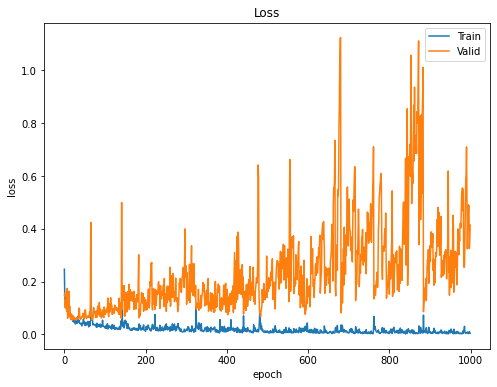

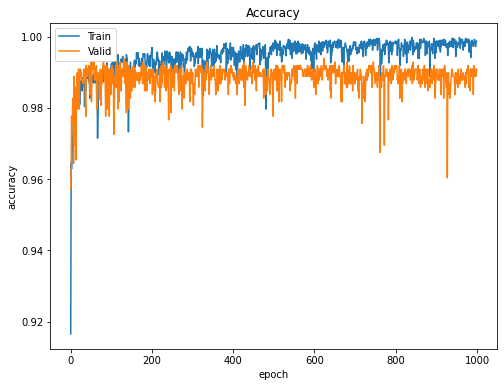

39/39 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.9797 - recall_1: 0.8679 - precision_1: 0.8932
Test Loss: 0.41406, Test Accuracy: 97.966%, Recall : 0.868, Precision : 0.893


(<keras.optimizers.optimizer_v2.adam.Adam at 0x7ff53e321490>,
 <keras.callbacks.History at 0x7ff5b00559d0>)

In [11]:
shape = X_train.shape[1]

mlp_model = build_mlp_model(shape)


print("=" * 30, "MLP 모델", "=" * 30)
run_model(mlp_model, X_train, y_train, X_test, y_test,epochs=1000)